## **Centroids Based Clustering**
Centroid-based clustering organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers.

### **Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
## Read the dataset

dataset=pd.read_csv('Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


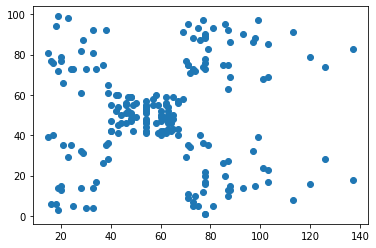

In [4]:
## scatter plot

plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

In [5]:
## Scaling 

scaler = MinMaxScaler()
scaler.fit(dataset[['Annual Income (k$)']])
dataset['Annual Income (k$)'] = scaler.transform(dataset[['Annual Income (k$)']])

In [6]:
scaler.fit(dataset[['Spending Score (1-100)']])
dataset['Spending Score (1-100)'] = scaler.transform(dataset[['Spending Score (1-100)']])

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


In [8]:
## uisng 3rd and 4th feature only and converting them into numpy array

x = dataset.iloc[:,[3,4]].values

In [9]:
x

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

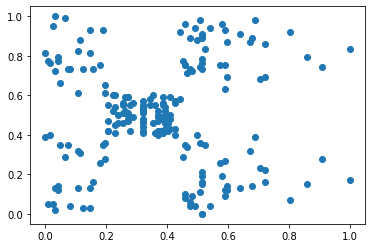

In [10]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])

### **How does K-Means work?**
K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.

In [11]:
## Elbow Method


# Within Cluster Sum of Squares = wcss
wcss=[]
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### **Elbow Method**
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center

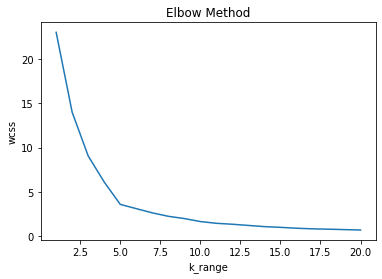

In [12]:
k_range = range(1,21)
plt.plot(k_range,wcss)
plt.title('Elbow Method')
plt.xlabel('k_range')
plt.ylabel('wcss')
plt.show()

In [13]:
k_mean = KMeans(n_clusters=5)
k_mean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
Label_or_predicted = k_mean.fit_predict(x)

In [15]:
Label_or_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [16]:
dataset['cluster'] = Label_or_predicted

In [17]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,4
5,6,Female,22,0.016393,0.765306,3
6,7,Female,35,0.024590,0.051020,4
7,8,Female,23,0.024590,0.948980,3
8,9,Male,64,0.032787,0.020408,4
9,10,Female,30,0.032787,0.724490,3


In [18]:
d_1 = dataset[dataset.cluster==0]
d_2 = dataset[dataset.cluster==1]
d_3 = dataset[dataset.cluster==2]
d_4 = dataset[dataset.cluster==3]
d_5 = dataset[dataset.cluster==4]

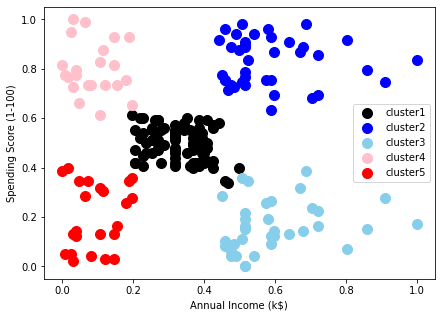

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=100,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='blue',s=100,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='skyblue',s=100,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=100,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=100,label='cluster5')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [20]:
k_mean.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

In [21]:
k_mean.cluster_centers_[0][1]

0.49508692365835216

In [22]:
print(f"Co-ordinates of Cluseter i :     x           y \n")
for i in range(len(k_mean.cluster_centers_)):
    print(f"Co-ordinates of Cluseter {i} : {k_mean.cluster_centers_[i]} ")
 

Co-ordinates of Cluseter i :     x           y 

Co-ordinates of Cluseter 0 : [0.33029751 0.49508692] 
Co-ordinates of Cluseter 1 : [0.58638083 0.82783883] 
Co-ordinates of Cluseter 2 : [0.6        0.16443149] 
Co-ordinates of Cluseter 3 : [0.08792846 0.79962894] 
Co-ordinates of Cluseter 4 : [0.09265859 0.20319432] 


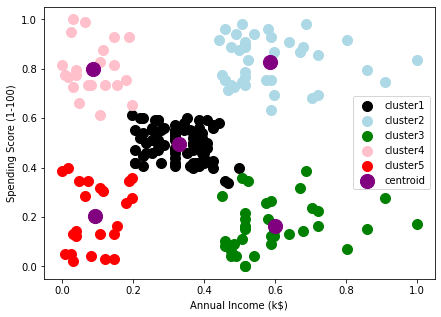

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['Annual Income (k$)'],d_1['Spending Score (1-100)'],c='black',s=100,label='cluster1')
plt.scatter(d_2['Annual Income (k$)'],d_2['Spending Score (1-100)'],c='lightblue',s=100,label='cluster2')
plt.scatter(d_3['Annual Income (k$)'],d_3['Spending Score (1-100)'],c='green',s=100,label='cluster3')
plt.scatter(d_4['Annual Income (k$)'],d_4['Spending Score (1-100)'],c='pink',s=100,label='cluster4')
plt.scatter(d_5['Annual Income (k$)'],d_5['Spending Score (1-100)'],c='red',s=100,label='cluster5')

plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],c='purple',s=200,label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()